<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/regression_ROW_FORM_BARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
!pip install shap

     |████████████████████████████████| 263 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 5.7 MB/s 
     |████████████████████████████████| 1.7 MB 10.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 105 kB 35.7 MB/s 
     |████████████████████████████████| 6.8 MB 23.9 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 167 kB 47.0 MB/s 
     |████████████████████████████████| 14.4 MB 57 kB/s 
     |████████████████████████████████| 271 kB 43.3 MB/s 
     |████████████████████████████████| 1.3 MB 35.2 MB/s 
     |████████████████████████████████| 248 kB 50.6 MB/s 
     |████████████████████████████████| 2.0 MB 28.9 MB/s 
     |████████████████████████████████| 3.1 MB 32.9 MB/s 
     |████████████████████████████████| 62 kB 774 kB/s 
     |█████████████████████

In [3]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.regression import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn

In [ ]:
#data = pd.read_csv('/content/park_1st_shock.csv')

In [6]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/1.csv'
# load the dataset
df = pd.read_csv(url)

In [7]:
df.head()

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,MIDR
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.0,0.0,0.0,0.3422
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.0,0.0,0.0,1.6347
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.0,0.0,0.0,0.3256
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.0,0.0,0.0,0.2177
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.0,0.0,0.0,2.7863


In [ ]:
#reg = setup(data = data, target=data.columns[-1], session_id=99, html=False, silent=True, verbose=False)

In [8]:
reg = setup(data = df, target=df.columns[-1], session_id=99, html=False, silent=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,99
1,Target,MIDR
2,Original Data,"(1950, 19)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1364, 17)"


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.149,0.5849,0.299


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.149,0.5849,0.299
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.170,0.3484,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016
llar,Lasso Least Angle Regression,0.7543,0.9469,0.9707,-0.0108,0.4202,2.8469,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016
llar,Lasso Least Angle Regression,0.7543,0.9469,0.9707,-0.0108,0.4202,2.8469,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016
llar,Lasso Least Angle Regression,0.7543,0.9469,0.9707,-0.0108,0.4202,2.8469,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016
llar,Lasso Least Angle Regression,0.7543,0.9469,0.9707,-0.0108,0.4202,2.8469,0.013
par,Passive Aggressive Regressor,0.7446,1.4678,1.1364,-0.5752,0.3307,0.7006,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
huber,Huber Regressor,0.3438,0.2478,0.4919,0.7378,0.1884,0.7261,0.057
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016
llar,Lasso Least Angle Regression,0.7543,0.9469,0.9707,-0.0108,0.4202,2.8469,0.013
par,Passive Aggressive Regressor,0.7446,1.4678,1.1364,-0.5752,0.3307,0.7006,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
huber,Huber Regressor,0.3438,0.2478,0.4919,0.7378,0.1884,0.7261,0.057
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016
llar,Lasso Least Angle Regression,0.7543,0.9469,0.9707,-0.0108,0.4202,2.8469,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
huber,Huber Regressor,0.3438,0.2478,0.4919,0.7378,0.1884,0.7261,0.057
lar,Least Angle Regression,0.4422,0.4716,0.5778,0.5082,0.2278,1.6721,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1887,0.1035,0.3184,0.8883,0.1052,0.1752,0.789
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013
huber,Huber Regressor,0.3438,0.2478,0.4919,0.7378,0.1884,0.7261,0.057


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1887,0.1035,0.3184,0.8883,0.1052,0.1752,0.789
et,Extra Trees Regressor,0.1884,0.1064,0.3237,0.8840,0.1057,0.1706,0.649
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015
omp,Orthogonal Matching Pursuit,0.3202,0.2318,0.4776,0.7550,0.1760,0.3477,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1887,0.1035,0.3184,0.8883,0.1052,0.1752,0.789
et,Extra Trees Regressor,0.1884,0.1064,0.3237,0.8840,0.1057,0.1706,0.649
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
ada,AdaBoost Regressor,0.3527,0.2099,0.4578,0.7721,0.1937,0.9696,0.140
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015
lasso,Lasso Regression,0.3100,0.2227,0.4678,0.7647,0.1700,0.3484,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1904,0.0968,0.3068,0.8968,0.1054,0.2452,0.197
rf,Random Forest Regressor,0.1887,0.1035,0.3184,0.8883,0.1052,0.1752,0.789
et,Extra Trees Regressor,0.1884,0.1064,0.3237,0.8840,0.1057,0.1706,0.649
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
ada,AdaBoost Regressor,0.3527,0.2099,0.4578,0.7721,0.1937,0.9696,0.140
en,Elastic Net,0.3100,0.2224,0.4675,0.7650,0.1701,0.3449,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1722,0.0867,0.2902,0.9076,0.0968,0.1899,0.124
gbr,Gradient Boosting Regressor,0.1904,0.0968,0.3068,0.8968,0.1054,0.2452,0.197
rf,Random Forest Regressor,0.1887,0.1035,0.3184,0.8883,0.1052,0.1752,0.789
et,Extra Trees Regressor,0.1884,0.1064,0.3237,0.8840,0.1057,0.1706,0.649
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
ada,AdaBoost Regressor,0.3527,0.2099,0.4578,0.7721,0.1937,0.9696,0.140


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1722,0.0867,0.2902,0.9076,0.0968,0.1899,0.124
gbr,Gradient Boosting Regressor,0.1904,0.0968,0.3068,0.8968,0.1054,0.2452,0.197
rf,Random Forest Regressor,0.1887,0.1035,0.3184,0.8883,0.1052,0.1752,0.789
et,Extra Trees Regressor,0.1884,0.1064,0.3237,0.8840,0.1057,0.1706,0.649
knn,K Neighbors Regressor,0.2406,0.1542,0.3875,0.8343,0.1348,0.2377,0.063
lr,Linear Regression,0.2757,0.1585,0.3939,0.8312,0.1490,0.5849,0.299
br,Bayesian Ridge,0.2757,0.1588,0.3941,0.8312,0.1485,0.5835,0.015
ridge,Ridge Regression,0.2768,0.1622,0.3981,0.8283,0.1486,0.5804,0.014
dt,Decision Tree Regressor,0.2565,0.1941,0.4378,0.7897,0.1456,0.2318,0.024
ada,AdaBoost Regressor,0.3527,0.2099,0.4578,0.7721,0.1937,0.9696,0.140


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [11]:
best = create_model("lightgbm", fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1599,0.0658,0.2564,0.9388,0.0894,0.2412
1,0.1821,0.0839,0.2897,0.9137,0.0926,0.1887
2,0.2087,0.1062,0.3259,0.8950,0.1112,0.1781
3,0.1576,0.0714,0.2673,0.9249,0.0900,0.1396
4,0.1800,0.1017,0.3189,0.8605,0.1046,0.1687
5,0.1437,0.0527,0.2296,0.9314,0.0826,0.1574
6,0.1574,0.0617,0.2484,0.9381,0.0845,0.1997
7,0.1622,0.0712,0.2668,0.9079,0.0978,0.2060
8,0.1914,0.1713,0.4139,0.8522,0.1157,0.2467
9,0.1790,0.0812,0.2849,0.9133,0.0997,0.1726


In [12]:
tuned_model = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1846,0.0804,0.2835,0.9252,0.0986,0.3324
1,0.1784,0.0809,0.2844,0.9168,0.0899,0.2047
2,0.2192,0.1266,0.3559,0.8748,0.1168,0.2660
3,0.1840,0.0790,0.2811,0.9169,0.0980,0.1898
4,0.1872,0.1091,0.3303,0.8504,0.1065,0.2011
5,0.1533,0.0508,0.2254,0.9339,0.0891,0.1988
6,0.1690,0.0616,0.2483,0.9381,0.0877,0.2762
7,0.1849,0.0818,0.2861,0.8942,0.1053,0.2390
8,0.1968,0.2045,0.4522,0.8235,0.1222,0.2922
9,0.1927,0.0820,0.2864,0.9124,0.1014,0.2408


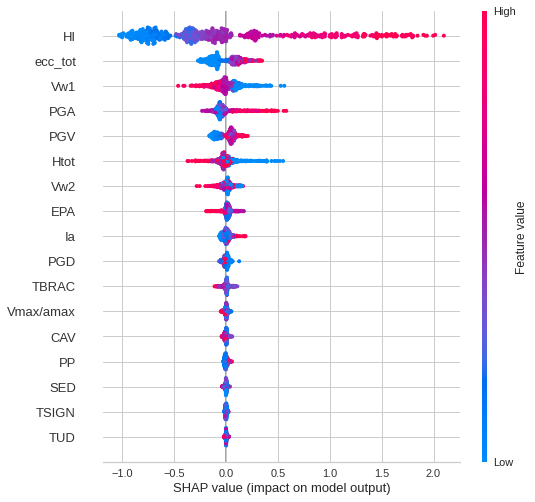

In [15]:
interpret_model(best)

In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…